In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import silhouette_score, homogeneity_score, adjusted_rand_score, completeness_score, adjusted_mutual_info_score
from scipy.stats import kurtosis

In [2]:
from sklearn.datasets import load_iris
data_iris = load_iris()

data_features = data_iris.data
data_label = data_iris.target

In [3]:
def plot_graphs(param, curves, curve_labels, param_name="", curve_name=""):
    colors = ['deepskyblue', 'red', 'yellow', 'green', 'midnightblue', 'fuchsia']
    plt.figure()
    lines = []
    for i in range(len(curve_labels)):
        l, = plt.plot(param, curves[i,:], ls='-', marker='+', color=colors[i])
        lines.append(l)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.legend(handles=lines, labels=curve_labels, loc='best')
    plt.show()

Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [5]:
def k_means_clustering(n=2, ini='k-means++', n_ini=10, it=300, t=1e-4, pre='auto', x=True, job=None, algo="auto"):
    
    kmeans = KMeans(n_clusters = n, init = ini, n_init = n_ini, max_iter = it, tol = t, precompute_distances = pre,
                    copy_x = x, n_jobs = job, algorithm = algo, random_state = 5)
    kmeans.fit(data_features)
    km_pred = kmeans.predict(data_features)
    
    sli_score = silhouette_score(data_features, km_pred, metric='euclidean')
    homo_score = homogeneity_score(data_label, km_pred)
    adj_score = adjusted_rand_score(data_label, km_pred)
    adj_mut_score = adjusted_mutual_info_score(data_label, km_pred)
    comp_score = completeness_score(data_label, km_pred)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    return r

In [6]:
km_cluster_size = [2,3,4,5,6,7,8,9,10]
l_km_cluster = len(km_cluster_size)
km_cluster_scores = np.zeros((5,l_km_cluster))
for i in range(l_km_cluster):
    km_cluster_scores[:,i] = k_means_clustering(n=km_cluster_size[i])

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

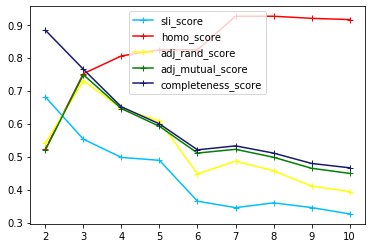

In [7]:
plot_graphs(km_cluster_size, km_cluster_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [8]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit_predict(data_features)

homo_score = homogeneity_score(data_label, kmeans)
adj_score = adjusted_rand_score(data_label, kmeans)
adj_mut_score = adjusted_mutual_info_score(data_label, kmeans)
comp_score = completeness_score(data_label, kmeans)
print(homo_score)
print(adj_score)
print(adj_mut_score)
print(comp_score)

0.7514854021988339
0.7302382722834697
0.7483723933229485
0.7649861514489816


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


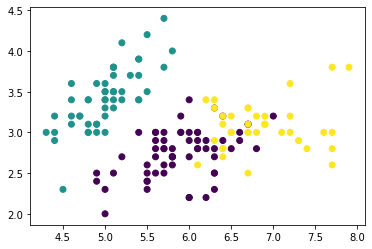

In [9]:
plt.scatter(data_features[:,0], data_features[:,1], c=kmeans)
plt.show()

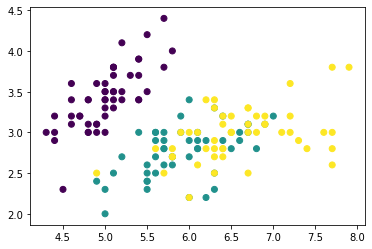

In [10]:
plt.scatter(data_features[:,0], data_features[:,1], c=data_label)
plt.show()

In [11]:
def em_clustering(n=1, cov='full', t=0.001, reg=1e-06, it=100, init='kmeans', w=None, means=None, pre=None, warm=False):
    
    em = GaussianMixture(n_components=n, covariance_type=cov, tol=t, reg_covar=reg, max_iter=it,
                        init_params=init, weights_init=w, means_init=means, precisions_init=pre,
                        random_state=None, warm_start=warm)
    
    em_predict = em.fit_predict(data_features)
    
    sli_score = silhouette_score(data_features, em_predict)
    homo_score = homogeneity_score(data_label, em_predict)
    adj_score = adjusted_rand_score(data_label, em_predict)
    adj_mut_score = adjusted_mutual_info_score(data_label, em_predict)
    comp_score = completeness_score(data_label, em_predict)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    
    return r

In [12]:
em_cluster_size = [2,3,4,5,6,7,8,9,10]
l_em_cluster = len(em_cluster_size)
em_cluster_scores = np.zeros((5,l_em_cluster))
for i in range(l_em_cluster):
    em_cluster_scores[:,i] = em_clustering(n=em_cluster_size[i])

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

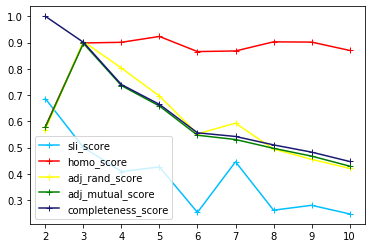

In [13]:
plot_graphs(em_cluster_size, em_cluster_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [14]:
cluster_em = GaussianMixture(n_components = 3)
cluster_em = cluster_em.fit_predict(data_features)

homo_score = homogeneity_score(data_label, cluster_em)
adj_score = adjusted_rand_score(data_label, cluster_em)
adj_mut_score = adjusted_mutual_info_score(data_label, cluster_em)
comp_score = completeness_score(data_label, cluster_em)
print(homo_score)
print(adj_score)
print(adj_mut_score)
print(comp_score)

0.8983263672602775
0.9038742317748124
0.8970537476260634
0.9010648908640206


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


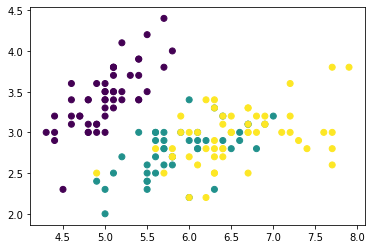

In [15]:
plt.scatter(data_features[:,0], data_features[:,1], c=cluster_em)
plt.show()

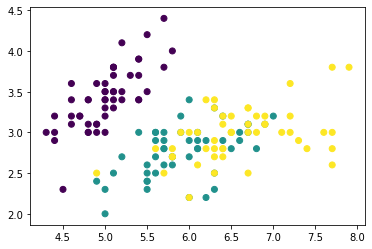

In [16]:
plt.scatter(data_features[:,0], data_features[:,1], c=data_label)
plt.show()

Dimensionality Reduction

In [17]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as SRP
from sklearn.feature_selection import SelectPercentile as SP

In [18]:
def dr_pca(n):
    pca = PCA(n_components=n, random_state=3)
    x_pca = pca.fit(data_features)
    
    cum = np.cumsum(pca.explained_variance_ratio_)
    
    fig, x1 = plt.subplots()
    x1.plot(list(range(len(pca.explained_variance_ratio_))), cum, 'b-')
    x1.set_xlabel('Principal components')
    x1.set_ylabel('Cumulative explained variance ratio', color='b')
    x1.tick_params('y', colors='b')
    
    x2 = x1.twinx()
    x2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
    x2.set_ylabel('Eigenvalues', color='m')
    x2.tick_params('y', colors='m')
    
    plt.show()

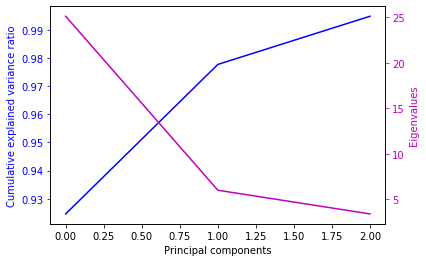

In [19]:
dr_pca(3)

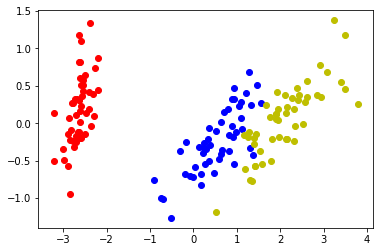

In [20]:
pca = PCA(n_components=2, random_state=3)
x_pca = pca.fit_transform(data_features)

cls_0 = []
cls_1 = []
cls_2 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_pca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_pca[i, :])
    elif(data_label[i] == 2):
        cls_2.append(x_pca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')
plt.plot(np.asarray(cls_2)[:,0], np.asarray(cls_2)[:,1], 'yo')

plt.show()

In [21]:
def dr_ica(n=2):
    ica = ICA(n_components=n, random_state=3)
    
    x_ica = ica.fit_transform(data_features)
    
    r = np.mean(kurtosis(x_ica))
    
    return r

In [22]:
list_ica_n = [1,2,3,4]
len_ica_n = len(list_ica_n)
scores_ica_n = np.zeros((1,len_ica_n))
for i in range(len_ica_n):
    scores_ica_n[0,i] = dr_ica(n=list_ica_n[i])

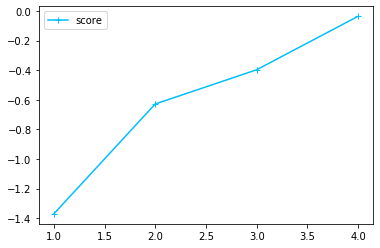

In [23]:
plot_graphs(list_ica_n, scores_ica_n,["score"])

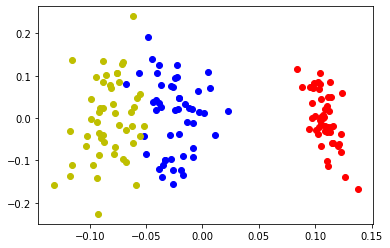

In [24]:
ica = ICA(n_components=4, random_state=3)
x_ica = ica.fit_transform(data_features)

cls_0 = []
cls_1 = []
cls_2 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_ica[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_ica[i, :])
    elif(data_label[i] == 2):
        cls_2.append(x_ica[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')
plt.plot(np.asarray(cls_2)[:,0], np.asarray(cls_2)[:,1], 'yo')

plt.show()

In [25]:
def dr_rca(n=2):
    ti
    rca = GRP(n_components=n)
    x_rca = rca.fit_transform(data_features)
    
    x_rca = x_rca.dot()
    print(x_rca.components_.toarray())

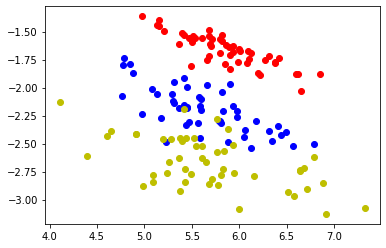

In [26]:
rca = GRP(n_components=3, random_state=3)
x_rca = rca.fit_transform(data_features)

cls_0 = []
cls_1 = []
cls_2 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_rca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_rca[i, :])
    elif(data_label[i] == 2):
        cls_2.append(x_rca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')
plt.plot(np.asarray(cls_2)[:,0], np.asarray(cls_2)[:,1], 'yo')

plt.show()

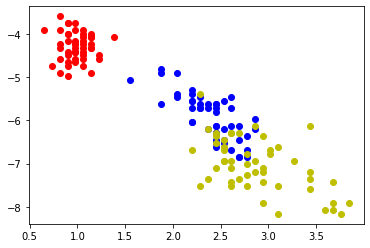

In [27]:
rca = SRP(n_components=3, random_state=3)
x_rca = rca.fit_transform(data_features)

cls_0 = []
cls_1 = []
cls_2 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_rca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_rca[i, :])
    elif(data_label[i] == 2):
        cls_2.append(x_rca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')
plt.plot(np.asarray(cls_2)[:,0], np.asarray(cls_2)[:,1], 'yo')

plt.show()

In [28]:
from sklearn import feature_selection
func_chi2 = feature_selection.chi2
func_classif = feature_selection.f_classif
func_mut_reg = feature_selection.mutual_info_regression

In [29]:
def dr_sp(f, p=20):
    sp = SP(percentile=p, score_func=f)
    x_transformed = sp.fit_transform(data_features, data_label)
    print(sp.scores_)
    return sp.scores_

[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


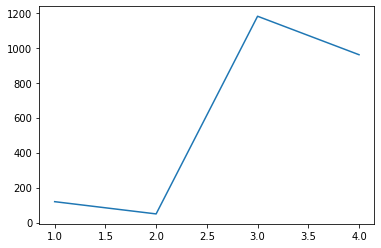

In [30]:
scores_sp_classif = dr_sp(f=func_classif, p=20)
plt.figure()
plt.plot(range(1, 5), scores_sp_classif)
plt.show()

[ 10.81782088   3.7107283  116.31261309  67.0483602 ]


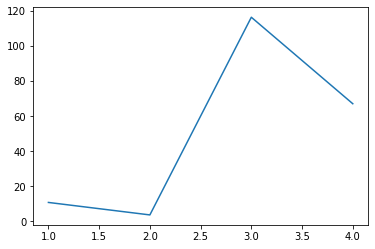

In [31]:
scores_sp_chi2 = dr_sp(f=func_chi2, p=20)
plt.figure()
plt.plot(range(1, 5), scores_sp_chi2)
plt.show()

Clustering after dimension reduction

In [32]:
def pca_features(n):
    pca = PCA(n_components=n, random_state=3)
    x_pca = pca.fit_transform(data_features)
    
    return x_pca

In [33]:
def ica_features(n):
    ica = ICA(n_components=n, random_state=3)
    x_ica = ica.fit_transform(data_features)
    
    return x_ica

In [34]:
def rca_features(n=2,r=5):
    rca = GRP(n_components=n, random_state=r)
    rca.fit(data_features)
    x_rca = rca.transform(data_features)
    
    return x_rca

In [35]:
def sp_features(f=func_classif, p=50):
    sp = SP(percentile=p, score_func=f)
    x_transformed = sp.fit_transform(data_features, data_label)
    return x_transformed

In [36]:
def k_means_dim_red(trans_features, n=3, ini='k-means++', n_ini=10, it=300, t=1e-4, pre='auto', x=True, job=None, algo="auto"):
    
    kmeans = KMeans(n_clusters = n, init = ini, n_init = n_ini, max_iter = it, tol = t, precompute_distances = pre,
                    copy_x = x, n_jobs = job, algorithm = algo, random_state = 5)
    kmeans = kmeans.fit_predict(trans_features)
    
    sli_score = silhouette_score(trans_features, kmeans)
    homo_score = homogeneity_score(data_label, kmeans)
    adj_score = adjusted_rand_score(data_label, kmeans)
    adj_mut_score = adjusted_mutual_info_score(data_label, kmeans)
    comp_score = completeness_score(data_label, kmeans)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    return r

In [37]:
pca_km_size = [1,2,3,4]
l_pca_km = len(pca_km_size)
pca_km_scores = np.zeros((5,l_pca_km))
for i in range(l_pca_km):
    pca_km_scores[:,i] = k_means_dim_red(pca_features(pca_km_size[i]), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

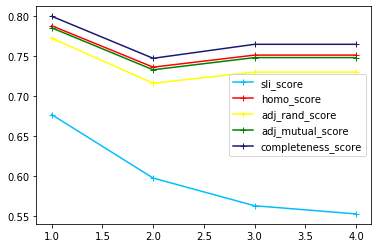

In [38]:
plot_graphs(pca_km_size, pca_km_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [39]:
ica_km_size = [1,2,3,4]
l_ica_km = len(ica_km_size)
ica_km_scores = np.zeros((5,l_ica_km))
for i in range(l_ica_km):
    ica_km_scores[:,i] = k_means_dim_red(ica_features(ica_km_size[i]), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

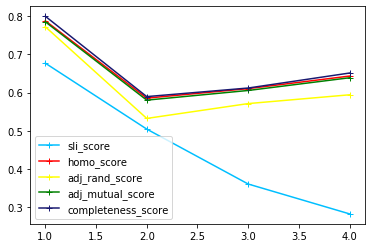

In [40]:
plot_graphs(ica_km_size, ica_km_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [42]:
rca_km_size = [1,2,3,4]
l_rca_km = len(rca_km_size)
rca_km_scores = np.zeros((5,200))
for i in range(200):
    rca_km_scores[:,i] = k_means_dim_red(rca_features(r=i), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


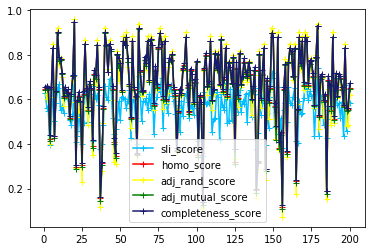

In [43]:
plot_graphs(range(1,201), rca_km_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [44]:
sp_km_size = [10,30,50,70,90,100]
l_sp_km = len(sp_km_size)
sp_km_scores = np.zeros((5,l_sp_km))
for i in range(l_sp_km):
    sp_km_scores[:,i] = k_means_dim_red(sp_features(p=sp_km_size[i]), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

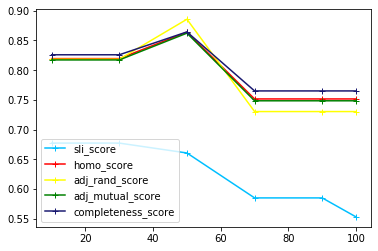

In [45]:
plot_graphs(sp_km_size, sp_km_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [46]:
def em_dim_red(x, n=3, cov='full', t=0.001, reg=1e-06, it=100, init='kmeans', w=None, means=None, pre=None, warm=False):
    
    em = GaussianMixture(n_components=n, covariance_type=cov, tol=t, reg_covar=reg, max_iter=it,
                        init_params=init, weights_init=w, means_init=means, precisions_init=pre,
                        random_state=5, warm_start=warm)
    
    em_predict = em.fit_predict(x)
    
    sli_score = silhouette_score(x, em_predict)
    homo_score = homogeneity_score(data_label, em_predict)
    adj_score = adjusted_rand_score(data_label, em_predict)
    adj_mut_score = adjusted_mutual_info_score(data_label, em_predict)
    comp_score = completeness_score(data_label, em_predict)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    return r

In [47]:
pca_em_size = [1,2,3,4]
l_pca_em = len(pca_em_size)
pca_em_scores = np.zeros((5,l_pca_em))
for i in range(l_pca_em):
    pca_em_scores[:,i] = em_dim_red(pca_features(pca_em_size[i]), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

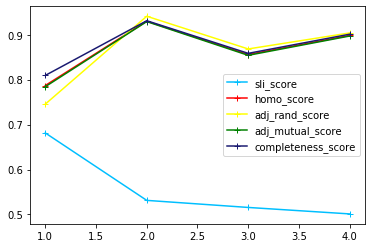

In [48]:
plot_graphs(pca_em_size, pca_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [49]:
ica_em_size = [1,2,3,4]
l_ica_em = len(ica_em_size)
ica_em_scores = np.zeros((5,l_ica_em))
for i in range(l_ica_em):
    ica_em_scores[:,i] = em_dim_red(ica_features(ica_em_size[i]), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

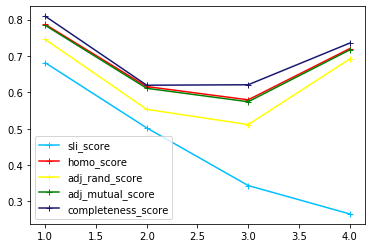

In [50]:
plot_graphs(ica_em_size, ica_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [51]:
rca_em_size = [1,2,3,4]
l_rca_em = len(rca_em_size)
rca_em_scores = np.zeros((5,200))
for i in range(200):
    rca_em_scores[:,i] = em_dim_red(rca_features(n=2,r=i), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

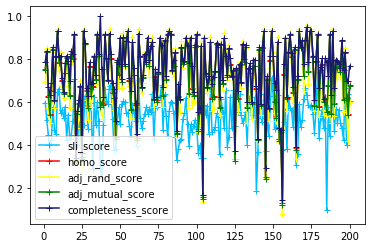

In [52]:
plot_graphs(range(1,201), rca_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [53]:
sp_em_size = [10,30,50,70,90,100]
l_sp_em = len(sp_em_size)
sp_em_scores = np.zeros((5,l_sp_em))
for i in range(l_sp_em):
    sp_em_scores[:,i] = em_dim_red(sp_features(p=sp_em_size[i]), n=3)

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

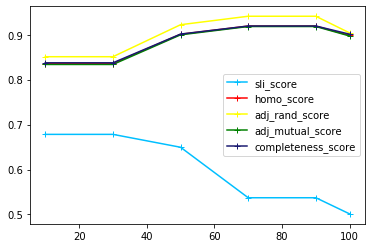

In [54]:
plot_graphs(sp_em_size, sp_em_scores, ["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])